# Round2 

### Dealing with the data

## Get data

In [83]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/Users/szabonikolett/Desktop/Ironhack-Labs/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv') 
pd.set_option('display.max_columns', None)  # listing all the columns

display(dataset.head())

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


## Show the dataframe shape

In [84]:
dataset.shape

(10910, 26)

## Standardize header names

In [85]:
cols = []
for column in range(len(dataset.columns)):
    cols.append(dataset.columns[column].lower().replace(' ', '_'))  # >> new best friend, replacing in column names space with _
dataset.columns = cols

dataset.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


## Numerical and categorical columns

In [86]:
dataset.dtypes

dataset.select_dtypes(np.number).columns

Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')

In [87]:
dataset.select_dtypes(object).columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

## Check and deal with NaN values

In [88]:
# Check the occurancy of NaN values / column

dataset.isna().sum() # number of nan values
round(dataset.isna().sum()/len(dataset),4)*100  # % of nan values

unnamed:_0                        0.00
customer                          0.00
state                             5.78
customer_lifetime_value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective_to_date                 0.00
employmentstatus                  0.00
gender                            0.00
income                            0.00
location_code                     0.00
marital_status                    0.00
monthly_premium_auto              0.00
months_since_last_claim           5.80
months_since_policy_inception     0.00
number_of_open_complaints         5.80
number_of_policies                0.00
policy_type                       0.00
policy                            0.00
renew_offer_type                  0.00
sales_channel                     0.00
total_claim_amount                0.00
vehicle_class                     5.70
vehicle_size                      5.70
vehicle_type             

In [90]:
# removing vehicle tpye as half of it is missing, makes no sense to work with that much missing values
# unnamed:_0  also removed, it's identical with row index

dataset = dataset.drop(['vehicle_type', 'unnamed:_0'], axis=1)
dataset

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [91]:
# dropping duplicates 

dataset = dataset.drop_duplicates()

## Datetime format 

In [67]:
# Examples of working with datetime format:

#file['date_time'] = pd.to_datetime(file['date_time'], errors='coerce')
#file.head()

In [92]:
# dataset['year'] = pd.DatetimeIndex(dataset['Effective_To_Date']).year # no need for this
# dataset['year'] = pd.DatetimeIndex(dataset['effective_to_date']).year

#dataset['effective_to_date']=pd.to_datetime(dataset['effective_to_date'])
dataset['month'] = pd.DatetimeIndex(dataset['effective_to_date']).month # added month column with 1,2 for January, February

dataset

/var/folders/0j/8qpr4dtj39x29g5tw9dvh26m0000gn/T/ipykernel_83386/1411836006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['month'] = pd.DatetimeIndex(dataset['effective_to_date']).month # added month column with 1,2 for January, February


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


In [93]:
dataset.shape

(10854, 25)

# Round3 
EDA (Exploratory Data Analysis)

## Show DataFrame info

In [94]:
# get the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from collections import Counter

dataset = pd.read_csv('/Users/szabonikolett/Desktop/Ironhack-Labs/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv') 
pd.set_option('display.max_columns', None)  

dataset.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [71]:
dataset.shape

(10910, 26)

## Describe DataFrame

In [72]:
dataset.describe().T 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10910.0,5454.500000,3149.590053,0.000000,2727.250000,5454.500000,8181.750000,10909.000000
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


In [95]:
# standardizing header names again 

cols = []
for column in range(len(dataset.columns)):
    cols.append(dataset.columns[column].lower().replace(' ', '_'))  # >> new best friend, replacing in column names space with _
dataset.columns = cols

dataset.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [96]:
dataset = dataset.drop(['vehicle_type', 'unnamed:_0'], axis=1)
dataset.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


### Show a plot of the total number of responses

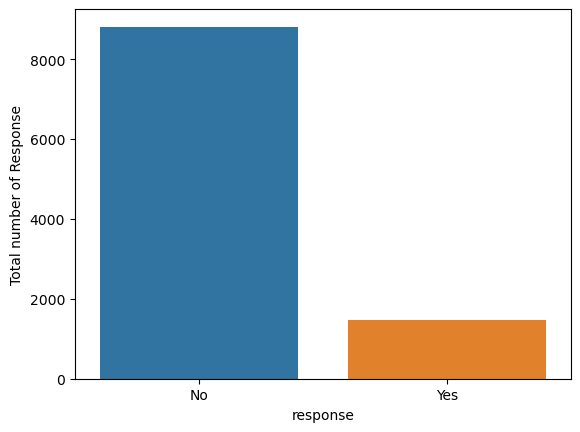

In [97]:
import seaborn as sns

sns.countplot(x = dataset['response'])
plt.ylabel('Total number of Response')

plt.show()

## Show a plot of the response rate by the sales channel 

In [76]:
# can't find why is it not working
#plt.figure(figsize=(8,4))
#sns.countplot(('response'), hue='sales_channel', dataset=dataset) # hue would bring some colors but no :( 
#plt.ylabel('Response by Sales Channel')
#plt.show()

In [77]:
# need to revisit
#plt.figure(figsize=(12,6))
#sns.boxplot(y='total_claim_amount' , X='response', dataset=dataset)
#plt.ylabel('Response by Total Claim Amount')
#plt.show()

In [78]:
# response rate by income
#plt.figure(figsize=(12,6))
#sns.boxplot(y='income', X='response', dataset=dataset)
#plt.ylabel('Response by Inncome')
#plt.show()

In [98]:
# trying to convert categoric into numeric

test=dataset['response'].value_counts()
test2=dataset['sales_channel'].value_counts()

### Messing with boxplot 

In [99]:
#sns.boxplot(x=test, y=test2) # checking the people who dontated higher amount whether live in fancier house or not
#plt.show()

In [100]:
#sns.scattplot(x=dataset['response'], y=dataset['sales channel'])
#plt.show()

In [102]:
#sns.boxplot(x=dataset['response'], y=dataset['total claim amount'])
#plt.show()

In [103]:
#sns.boxplot(x=dataset['response'], y=dataset['income'])
#plt.show()

# Round 4

## Continuous distributions, linear regression, linear regression

### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 

In [104]:
from sklearn.preprocessing import MinMaxScaler    
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [105]:
numerical = dataset.select_dtypes(include = np.number) 
pd.set_option('display.max_columns', None)  

numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [106]:
# dropping the leftover nan values 

numerical = numerical.dropna()
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
5,4745.181764,50549,61,2.0,73,0.0,7,292.800000
...,...,...,...,...,...,...,...,...
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [107]:
categorical = dataset.select_dtypes(include = object)
pd.set_option('display.max_columns', None)  
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [109]:
dataset = dataset.drop(['customer', 'effective_to_date'], axis=1)

In [ ]:
#when I drop a colum from my numerical db, I will also need to drop that from my origina data

## Check the normality of the numerical variables visually

### Use seaborn library to construct distribution plots for the numerical variables

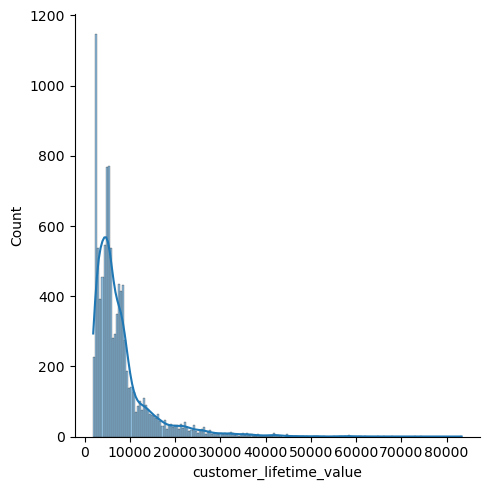

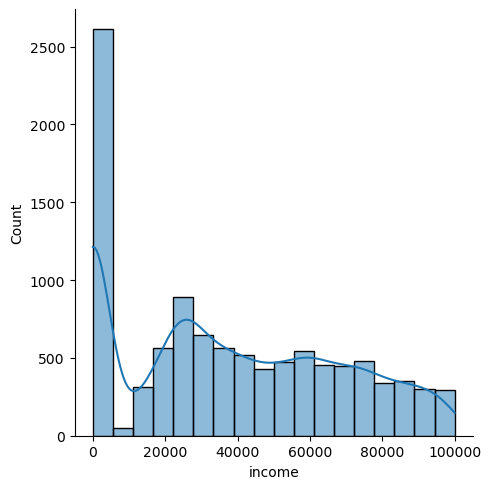

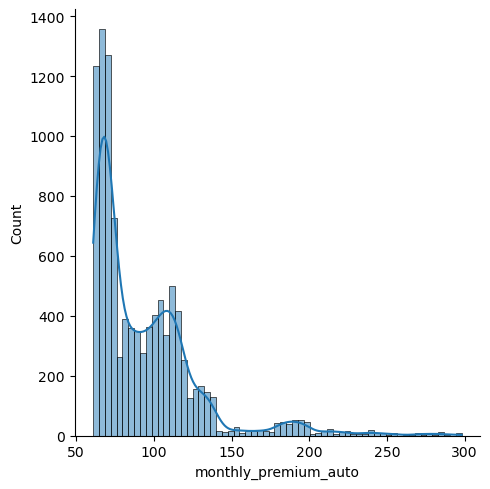

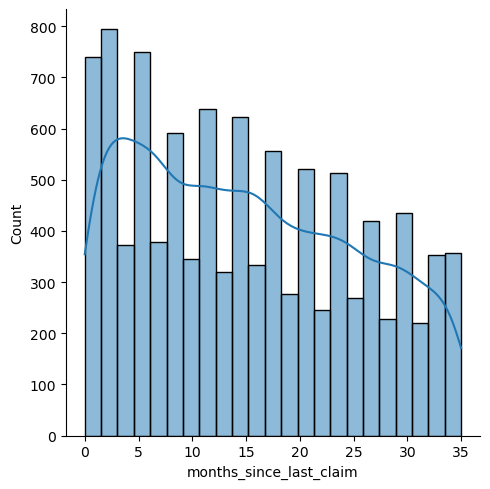

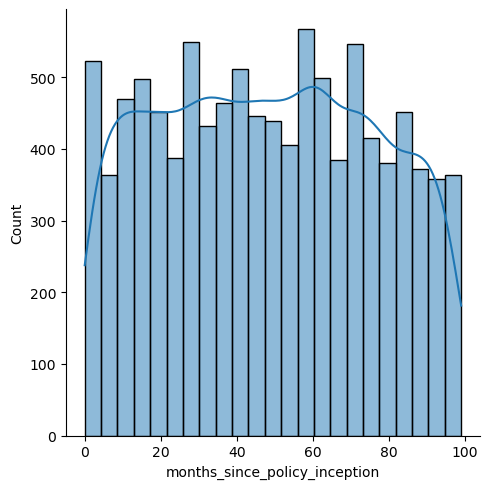

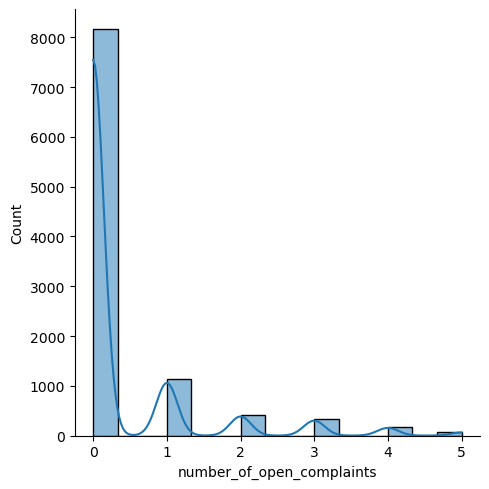

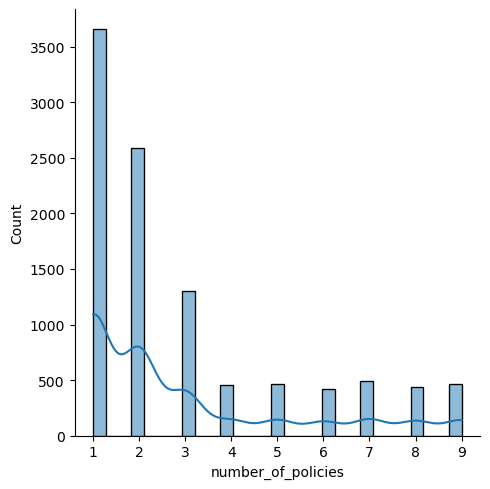

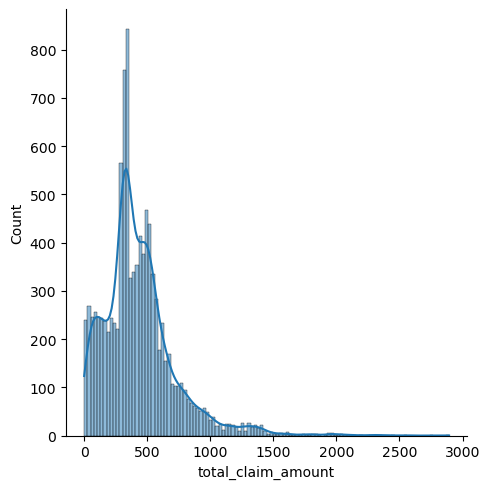

In [110]:
for col in numerical.columns:
    sns.displot(numerical[col], kde=True) # kde=True >> putting the line in 
    
plt.show()

### Use Matplotlib to construct histograms

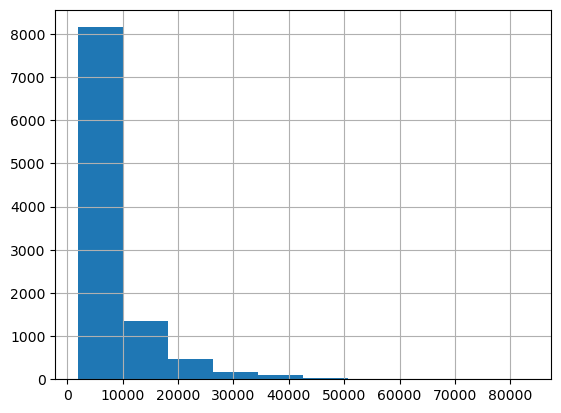

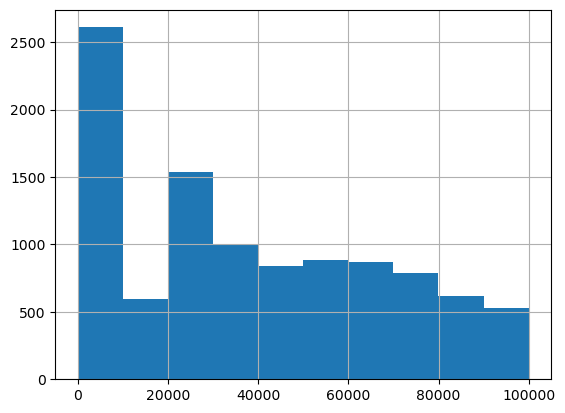

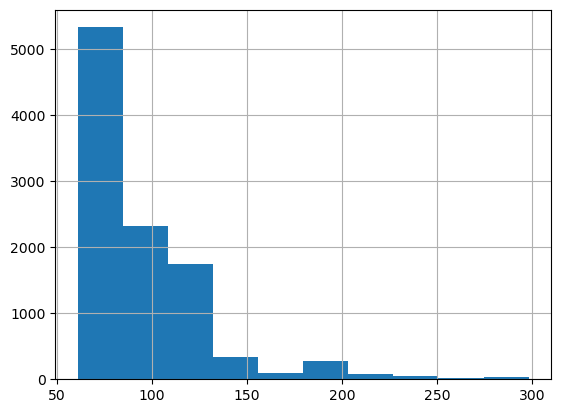

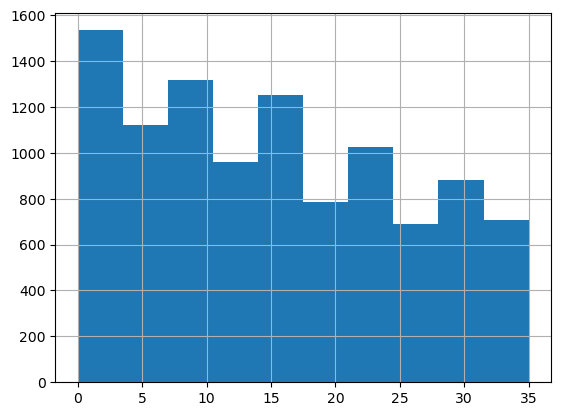

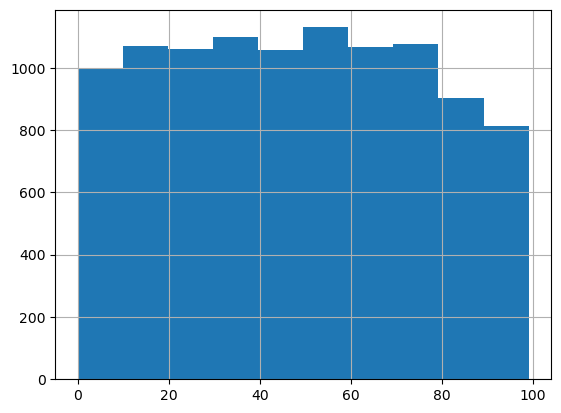

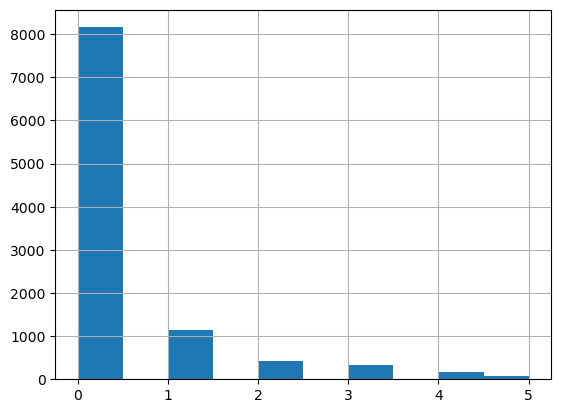

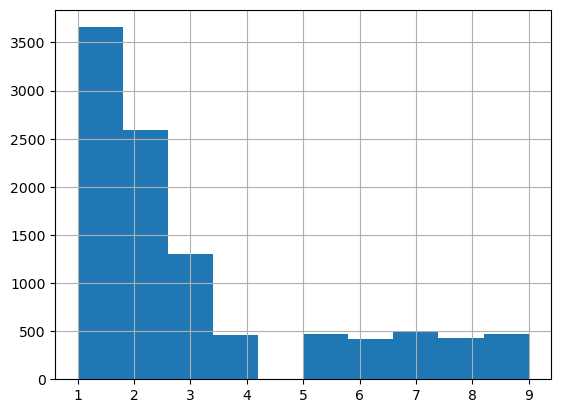

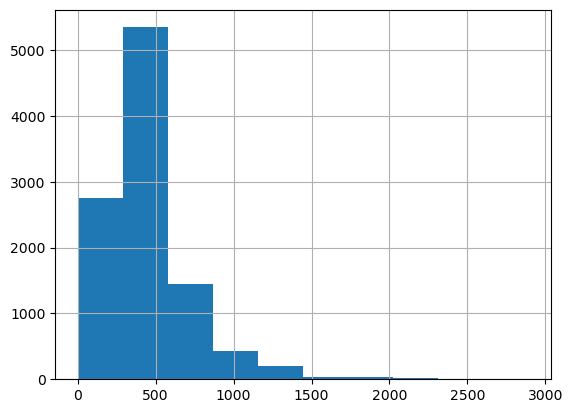

In [111]:
#fig, ax = plt.subplots()
for col in numerical.columns:
    numerical[col].hist()
    plt.show()

### Check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable


In [ ]:
correlations = round(numerical.corr(),2)
correlations

In [ ]:
sns.heatmap(correlations, annot=True) # printing 2 decimals with annot=True 
plt.show

We have a negativ high correlation between income and total_claim_amount, meaning if one of them increases the other one would decrease. 
The correlation between monthly_premium_auto and total_claim_amount is (positiv) strong, if one increases so would the other too. 

# Round 5

### Processing Data

## X-y split.
## Normalizing (numerical).

In [112]:
y=dataset['total_claim_amount'] # setting target on y axis
X=dataset.drop(['total_claim_amount'], axis=1) # »» setting features on X

In [114]:
dataset

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [115]:
X_num = X.select_dtypes(np.number) 
X_cat = X.select_dtypes(object)

print (X_num.shape, X_cat.shape)  #we've got 7 numerical and 14 categorical columns

(10910, 7) (10910, 14)


In [118]:
X_num.describe().T # checking the range of the values 

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.38119
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.00000
monthly_premium_auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.00000
months_since_last_claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.00000
months_since_policy_inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.00000
number_of_open_complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.00000
number_of_policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.00000


In [119]:
# normalizing all the values between 0-1 

transformer = MinMaxScaler().fit(X_num) 
X_normalized = transformer.transform(X_num)
print(X_normalized.shape)
X_normalized # if I run it, it's still an array
X_num_scale = pd.DataFrame(X_normalized, columns=X_num.columns) # turning into a dataframe to concat with onehot X numeric
X_num_scale.head()

(10910, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125
4,0.087527,0.236795,0.236287,NaN,0.313131,NaN,0.750


In [120]:
# normalizing by making data distributed with mean=0 and std=1
transformer = StandardScaler().fit(X_num)
X_standardized = transformer.transform(X_num)
print(X_standardized.shape)
X_num_standard = pd.DataFrame(X_standardized, columns=X_num.columns)
X_num_standard

(10910, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.466105,0.345635,-0.934819,-0.808451,0.139877,-0.421143,2.509455
1,-0.840946,-1.236462,-0.847713,-1.205282,-0.790709,-0.421143,-0.824922
2,1.006523,-0.507194,0.197554,1.870158,-0.611750,-0.421143,-0.408125
3,2.079112,0.380189,0.110448,-0.510828,-1.613919,-0.421143,-0.408125
4,0.146240,-0.456597,0.691152,NaN,-0.611750,NaN,1.675860
...,...,...,...,...,...,...,...
10905,1.095916,-1.236462,4.639940,NaN,-0.289625,NaN,1.675860
10906,-0.400710,0.777715,-0.818678,-0.808451,0.712545,-0.421143,1.259063
10907,2.305825,0.075787,3.130109,-0.411620,0.533586,-0.421143,-0.408125
10908,0.574273,0.878150,1.881595,-1.502905,-0.754917,3.962838,1.259063


## Round 6

One Hot/Label Encoding (categorical).
Concat DataFrames
Linear Regression

Train-test split.
Apply linear regression.
Model Validation


In [123]:
encoder.categories_

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington', nan],
       dtype=object),
 array(['No', 'Yes', nan], dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Rural', 'Suburban', 'Urban'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
        'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
        'Special L3'], dtype=object),
 array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object),
 array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
        'Two-D

In [126]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first').fit(X_cat) 
cols=encoder.get_feature_names(input_features=X_cat.columns) 
X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols) 

X_cat_encode

/Users/szabonikolett/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_California,state_Nevada,state_Oregon,state_Washington,state_nan,response_Yes,response_nan,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_nan,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10906,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10908,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Contact DataFrames, Linear Regression

In [ ]:
X=pd.concat([X_num_scale, X_cat_encode], axis=1) 
X.describe()

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape) 

In [ ]:
linreg=Linreg()

In [ ]:
# checking leftover nan values as I keep getting errors due to them
#dataset = dataset.dropna() # dropping nan

#dataset.isna().sum()
y_train.isna().sum() 
X_train.isna().sum() # » months_since_last_claim and number_of_open_complaints caused error, gonna drop those nans

In [ ]:
dataset = dataset.dropna()
dataset.isna().sum()

In [ ]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # fitting
linreg.fit(X_train, y_train)   # training
y_pred_linreg=linreg.predict(X_test)   # predicting

In [ ]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train) # making prediction on something what we already know
r2_score(y_train, predictions)

In [ ]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

In [ ]:
y_test[:5]

In [ ]:
predictions_test[:5] 

### Description:
R2.
MSE.
RMSE.
MAE.

In [ ]:
from sklearn.metrics import mean_squared_error 
mse=mean_squared_error(y_test,predictions_test)
mse

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

In [ ]:
y_test.mean()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, predictions_test)
print(mae)

In [ ]:
rmse = math.sqrt(mse)
print(rmse)

In [ ]:
r2 = r2_score(y_test, predictions_test)
r2

## Round 7

In [ ]:
data = pd.read_csv('/Users/szabonikolett/Desktop/Ironhack-Labs/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv') 

In [ ]:
def clean_data(df):
    df.columns=[lower().replace(' ', '_')]
    df=drop(columns=['vehicel_type', 'unnamed:_0'])
    df=df.dropna()
    df=df.drop_duplicates()
    df['month'] = pd.DatetimeIndex(dataset['effective_to_date']).month
    return df

def numerical_data(numerical):
    numerical=df.select_dtypes(include = np.number)
    numerical=numerical.dropna()
    #numerical.columns=sns.displot(numerical[col], kde=True)
    #plt.show
    #numerical=columns=numerical[col].hist()
    #plt.show()
    correlations = round(numerical.corr(),2)
    sns.heatmap(correlations, annot=True) 
    plt.show
    return numerical

def processed_data(processed):
    X_num=numerical
    X_cat=df.select_dtypes(object).columns
    y=data['Total Claim Amount'] 
    X=data.drop(['Total Claim Amount'], axis=1)
    return processed

def transformed_data(transformed):
    transformer = MinMaxScaler().fit(X_num)  
    X_normalized = transformer.transform(X_num)
    print(x_normalized.shape)
    X_normalized 
    X_num_scale = pd.Df(X_normalized, columns=X_num.columns
    return transformed
                               
def standard_scaler(std_scaler):
    transformer = StandardScaler().fit(X_num)
    X_standardized = transformer.transform(X_num)
    X_num_standardized = pd.Df(X_standardized, columns=X_num.columns)
    X_num_standardized.head()
    return(std_scaler)
    
                        
def one_hot_encodig(onehot):
    X_cat = X_cat.drop(columns=['Customer'])
                               